In [1]:
#Importing required Libraries
import pandas as pd
from pandas.tseries.offsets import BDay
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import datasets
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



# Loading required datasets and preparing the data to fit into the models that we are using

# The question numbers used in this doc are according the file (Project Desc_ELEN 520_Winter 2022.pdf)

In [2]:
isBusinessDay = BDay().onOffset
eth = 'Datasets/ETH2.csv'
eth_df = pd.read_csv(eth)
match_series = pd.to_datetime(eth_df['Date']).map(isBusinessDay)
eth_df = eth_df[match_series]
eth_df

/Users/sareddyrojareddy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/base.py:870: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)


,Date,Price,Open,High,Low,Vol.,Change %
0,1-Mar-22,2949.28,2922.44,3036.59,2858.54,917.00K,0.0092
1,28-Feb-22,2922.50,2616.34,2949.44,2574.12,899.19K,0.1170
4,25-Feb-22,2767.53,2596.52,2830.31,2573.39,828.87K,0.0659
5,24-Feb-22,2596.52,2578.54,2732.02,2303.07,1.85M,0.0071
6,23-Feb-22,2578.15,2637.38,2749.80,2578.15,636.50K,-0.0220
...,...,...,...,...,...,...,...
2176,16-Mar-16,12.88,13.06,13.89,12.62,19.24K,-0.0138
2177,15-Mar-16,13.06,12.63,13.42,11.98,39.73K,0.0448
2178,14-Mar-16,12.50,15.07,15.07,11.40,92.18K,-0.1705
2181,11-Mar-16,11.95,11.75,11.95,11.75,0.18K,0.0170


In [21]:
bitcoin = 'Datasets/BTC.csv'
bitcoin_df = pd.read_csv(bitcoin)
match_series_bitcoin = pd.to_datetime(bitcoin_df['Date']).map(isBusinessDay)
bitcoin_df = bitcoin_df[match_series_bitcoin]
bitcoin_df

/Users/sareddyrojareddy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/base.py:870: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)


,Date,Price,Open,High,Low,Vol.,Change %
0,2022-03-02,44151.1,44442.0,44777.0,43876.0,6.13K,-0.0065
1,2022-03-01,44442.0,43202.0,44939.0,42878.0,6.34K,0.0287
2,2022-02-28,43202.0,37734.0,44198.0,37502.0,8.45K,0.1449
5,2022-02-25,39243.0,38380.0,39717.0,38071.1,6.43K,0.0225
6,2022-02-24,38380.0,37292.0,39716.0,34435.0,17.88K,0.0292
...,...,...,...,...,...,...,...
3671,2012-02-08,5.6,5.6,5.6,5.6,-,-0.0158
3672,2012-02-07,5.7,5.7,5.7,5.7,-,0.0440
3673,2012-02-06,5.4,5.4,5.4,5.4,-,-0.0422
3676,2012-02-03,6.0,6.0,6.0,6.0,-,-0.0230


In [22]:
#Reading tesla,gold and S&P stock data sets
#adding a new column that is the change% for the respective stocks inorder to compare the stock,bitcoin and 
#ethereum dataset

tesla_df = pd.read_csv('Datasets/Tesla.csv')
tesla_df = tesla_df.rename(columns={"Close/Last": "Last_tesla","Volume":"Trading_Volume_Tesla","Open": "Open_tesla","High": "High_tesla","Low": "Low_tesla"})
tesla_df['Change_Tesla'] = (tesla_df['Open_tesla'] - tesla_df['Last_tesla'])/tesla_df['Open_tesla']

gold_df = pd.read_csv('Datasets/Gold.csv')
gold_df = gold_df.rename(columns={"Close/Last": "Last_gold","Volume":"Trading_Volume_Gold","Open": "Open_gold","High": "High_gold","Low": "Low_gold"})
gold_df['Change_Gold'] = (gold_df['Open_gold'] - gold_df['Last_gold'])/gold_df['Open_gold']


sp_df = pd.read_csv('Datasets/SP500.csv')
sp_df = sp_df.rename(columns={"Close/Last": "Last_SP","Volume":"Trading_Volume_SP","Open": "Open_SP","High": "High_SP","Low": "Low_SP"})
sp_df['Change_SP'] = ((sp_df['Open_SP'] - sp_df['Last_SP'])/sp_df['Open_SP'])*100

sp_df


,Date,Last_SP,Trading_Volume_SP,Open_SP,High_SP,Low_SP,Change_SP
0,02/28/2022,4373.94,--,4354.17,4388.84,4315.12,-0.454047
1,02/25/2022,4384.65,--,4298.38,4385.34,4286.83,-2.007035
2,02/24/2022,4288.70,--,4155.77,4294.73,4114.65,-3.198685
3,02/23/2022,4225.50,--,4324.93,4341.51,4221.51,2.298997
4,02/22/2022,4304.76,--,4332.74,4362.12,4267.11,0.645781
...,...,...,...,...,...,...,...
2546,03/07/2012,1352.63,--,1343.39,1354.85,1343.39,-0.687812
2547,03/06/2012,1343.36,--,1363.63,1363.63,1340.03,1.486474
2548,03/05/2012,1364.33,--,1369.59,1369.59,1359.13,0.384057
2549,03/02/2012,1369.63,--,1374.09,1374.53,1366.42,0.324578


# Preparing the DataFrame
i.e., adding required columns to one dataframe in order to fit into required columns

In [23]:
#rename columns
eth_df = eth_df.rename(columns ={"Price": "Last_eth","Open": "Open_eth","High": "High_eth","Low": "Low_eth","Change %":"Change_ETH"})
bitcoin_df = bitcoin_df.rename(columns={"Price": "Last_bitcoin","Open": "Open_bitcoin","High": "High_bitcoin","Low": "Low_bitcoin","Change %":"Change_BTC"})

#create dataframe using ETH and Bitcoin datasets
#crypto = pd.DataFrame(eth_df,columns=['Date','Last_eth','Change_ETH'])

crypto = pd.DataFrame(bitcoin_df,columns=['Date','Last_bitcoin','Change_BTC'])


crypto = crypto.join(eth_df['Last_eth'])
crypto = crypto.join(eth_df['Change_ETH'])
#crypto = crypto.join(bitcoin_df['High_bitcoin'])
#crypto = crypto.join(bitcoin_df['Low_bitcoin'])
crypto = crypto.join(tesla_df['Last_tesla'])
crypto = crypto.join(tesla_df['Trading_Volume_Tesla'])
crypto = crypto.join(tesla_df['Change_Tesla'])

crypto = crypto.join(gold_df['Last_gold'])
crypto = crypto.join(gold_df['Trading_Volume_Gold'])
crypto = crypto.join(gold_df['Change_Gold'])

crypto = crypto.join(sp_df['Last_SP'])
crypto = crypto.join(sp_df['Change_SP'])

crypto = crypto.replace([np.inf, -np.inf], np.nan)
crypto = crypto.dropna()
crypto

#crypto['Increase/Decrease'] = np.where(crypto['Change_BTC'] < 0, False, True)

crypto.head()


,Date,Last_bitcoin,Change_BTC,Last_eth,Change_ETH,Last_tesla,Trading_Volume_Tesla,Change_Tesla,Last_gold,Trading_Volume_Gold,Change_Gold,Last_SP,Change_SP
0,2022-03-02,44151.1,-0.0065,2949.28,0.0092,870.43,33002290.0,-0.067999,1900.7,239416.0,0.010567,4373.94,-0.454047
1,2022-03-01,44442.0,0.0287,2922.50,0.1170,809.87,25355920.0,-0.000791,1887.6,220963.0,0.009913,4384.65,-2.007035
5,2022-02-25,39243.0,0.0225,2596.52,0.0071,856.98,22833950.0,0.032754,1899.8,155484.0,0.000841,4348.87,0.814219
6,2022-02-24,38380.0,0.0292,2578.15,-0.0220,876.35,18392810.0,0.040416,1902.0,251680.0,-0.016026,4380.26,1.701054
7,2022-02-23,37292.0,-0.0263,2636.13,0.0258,923.39,17098130.0,-0.010218,1871.5,136348.0,-0.008623,4475.01,-0.432250


In [24]:
#Categorizing change in Bitcoin and ETH, so that it will be easier to apply QDA and KNN models
#Increase of change is represented by 1, where as decrease in change is represented by 0

def categorise(row):  
    if row['Change_BTC'] <= 0 :
        return 0
        
    return 1

def categorise_eth(row):  
    if row['Change_ETH'] <= 0 :
        return 0
        
    return 1

crypto['Increase/Decrease'] = crypto.apply(lambda row: categorise(row), axis=1)
crypto

crypto['Increase/Decrease_ETH'] = crypto.apply(lambda row: categorise_eth(row), axis=1)


crypto.to_csv('crypto.csv')

# Visualizing the relationship between the prices of stocks, bitcoin and ETH

41


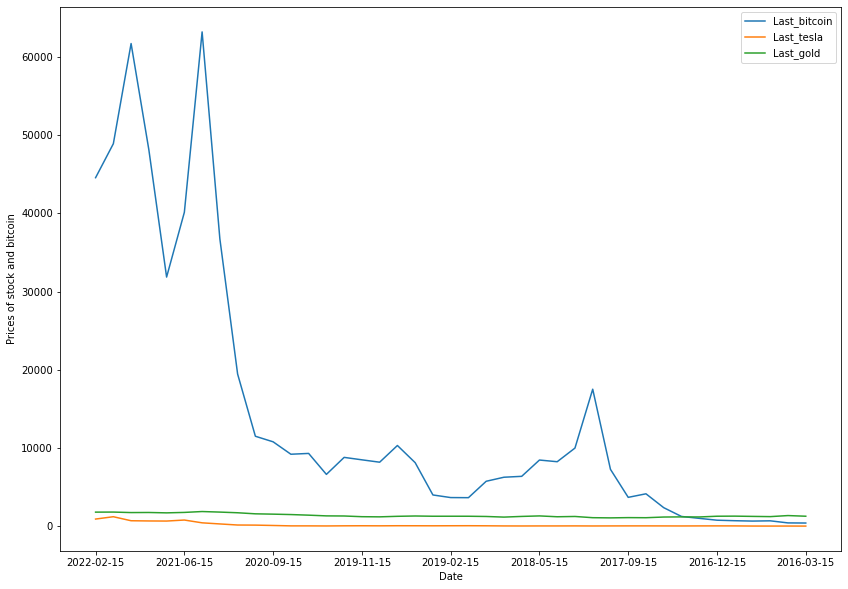

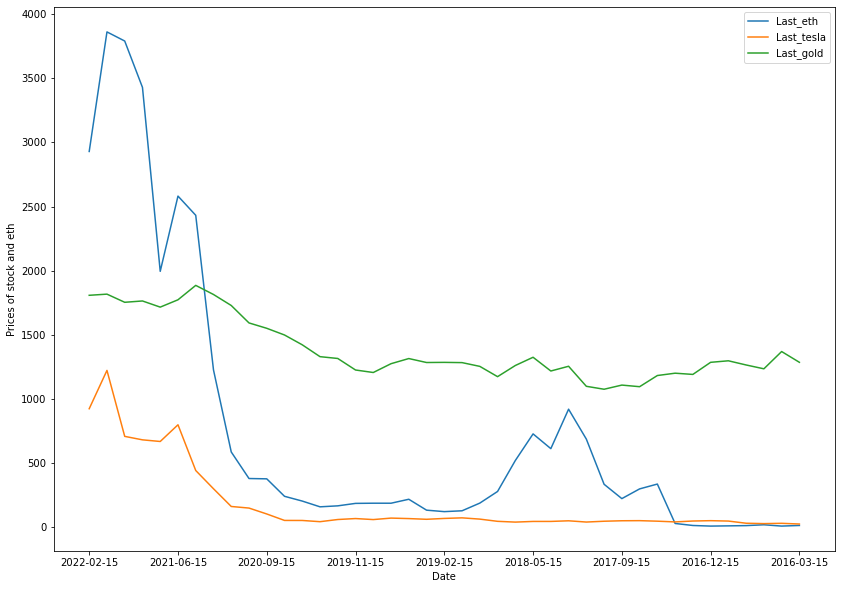

In [26]:
#Plotting graph how the stock,bitcoin and eth prices are varying over a timeperiod (taken the subset of the dates
#to show the visualization clearly)

crypto_subset = crypto

crypto_subset['Date'] = crypto_subset['Date'].astype(str)
crypto_subset = crypto_subset[crypto_subset.Date.str.match(r'^\d.*-\d.*-15')]


print(crypto_subset['Date'].count())

#plot of BTC correlation with gold and tesla stock prices
crypto_subset.plot(x="Date",y=["Last_bitcoin","Last_tesla","Last_gold"],figsize=(14,10))
plt.ylabel("Prices of stock and bitcoin")
plt.show()

#plot of ETH correlation with gold and tesla stock prices
crypto_subset.plot(x="Date",y=["Last_eth","Last_tesla","Last_gold"],figsize=(14,10))
plt.ylabel("Prices of stock and eth")
plt.show()

#From the Above graphs, we can see that as the stock price decreases, ETH/Bitcoin decreases by a massive amount than stock price.

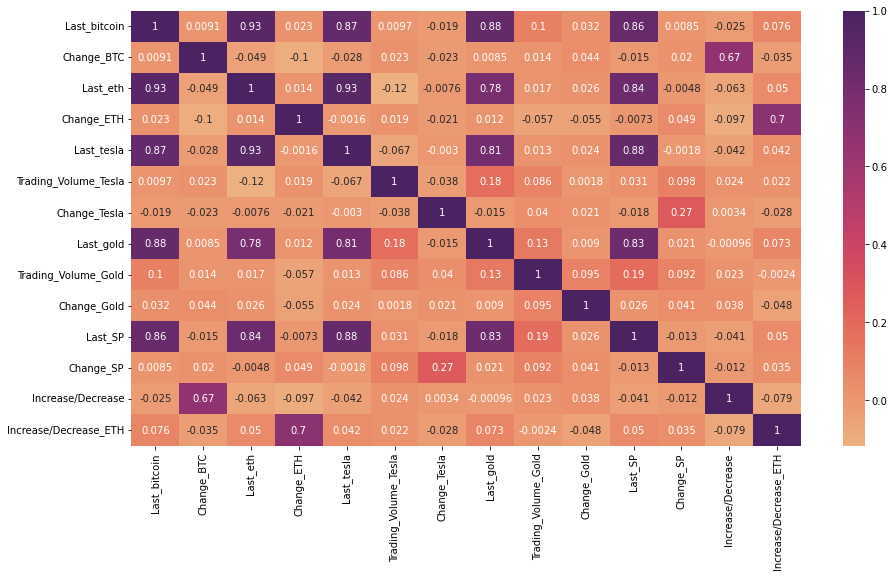

In [27]:
#Q7 - Graph representing correlation between Variables in the dataset
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



#heatmap
plt.figure(figsize = (15,8))
corr = crypto.corr()

#plot correlation matrix heatmap
hm = sns.heatmap(data = corr, annot = True, cmap = sns.color_palette("flare", as_cmap=True))

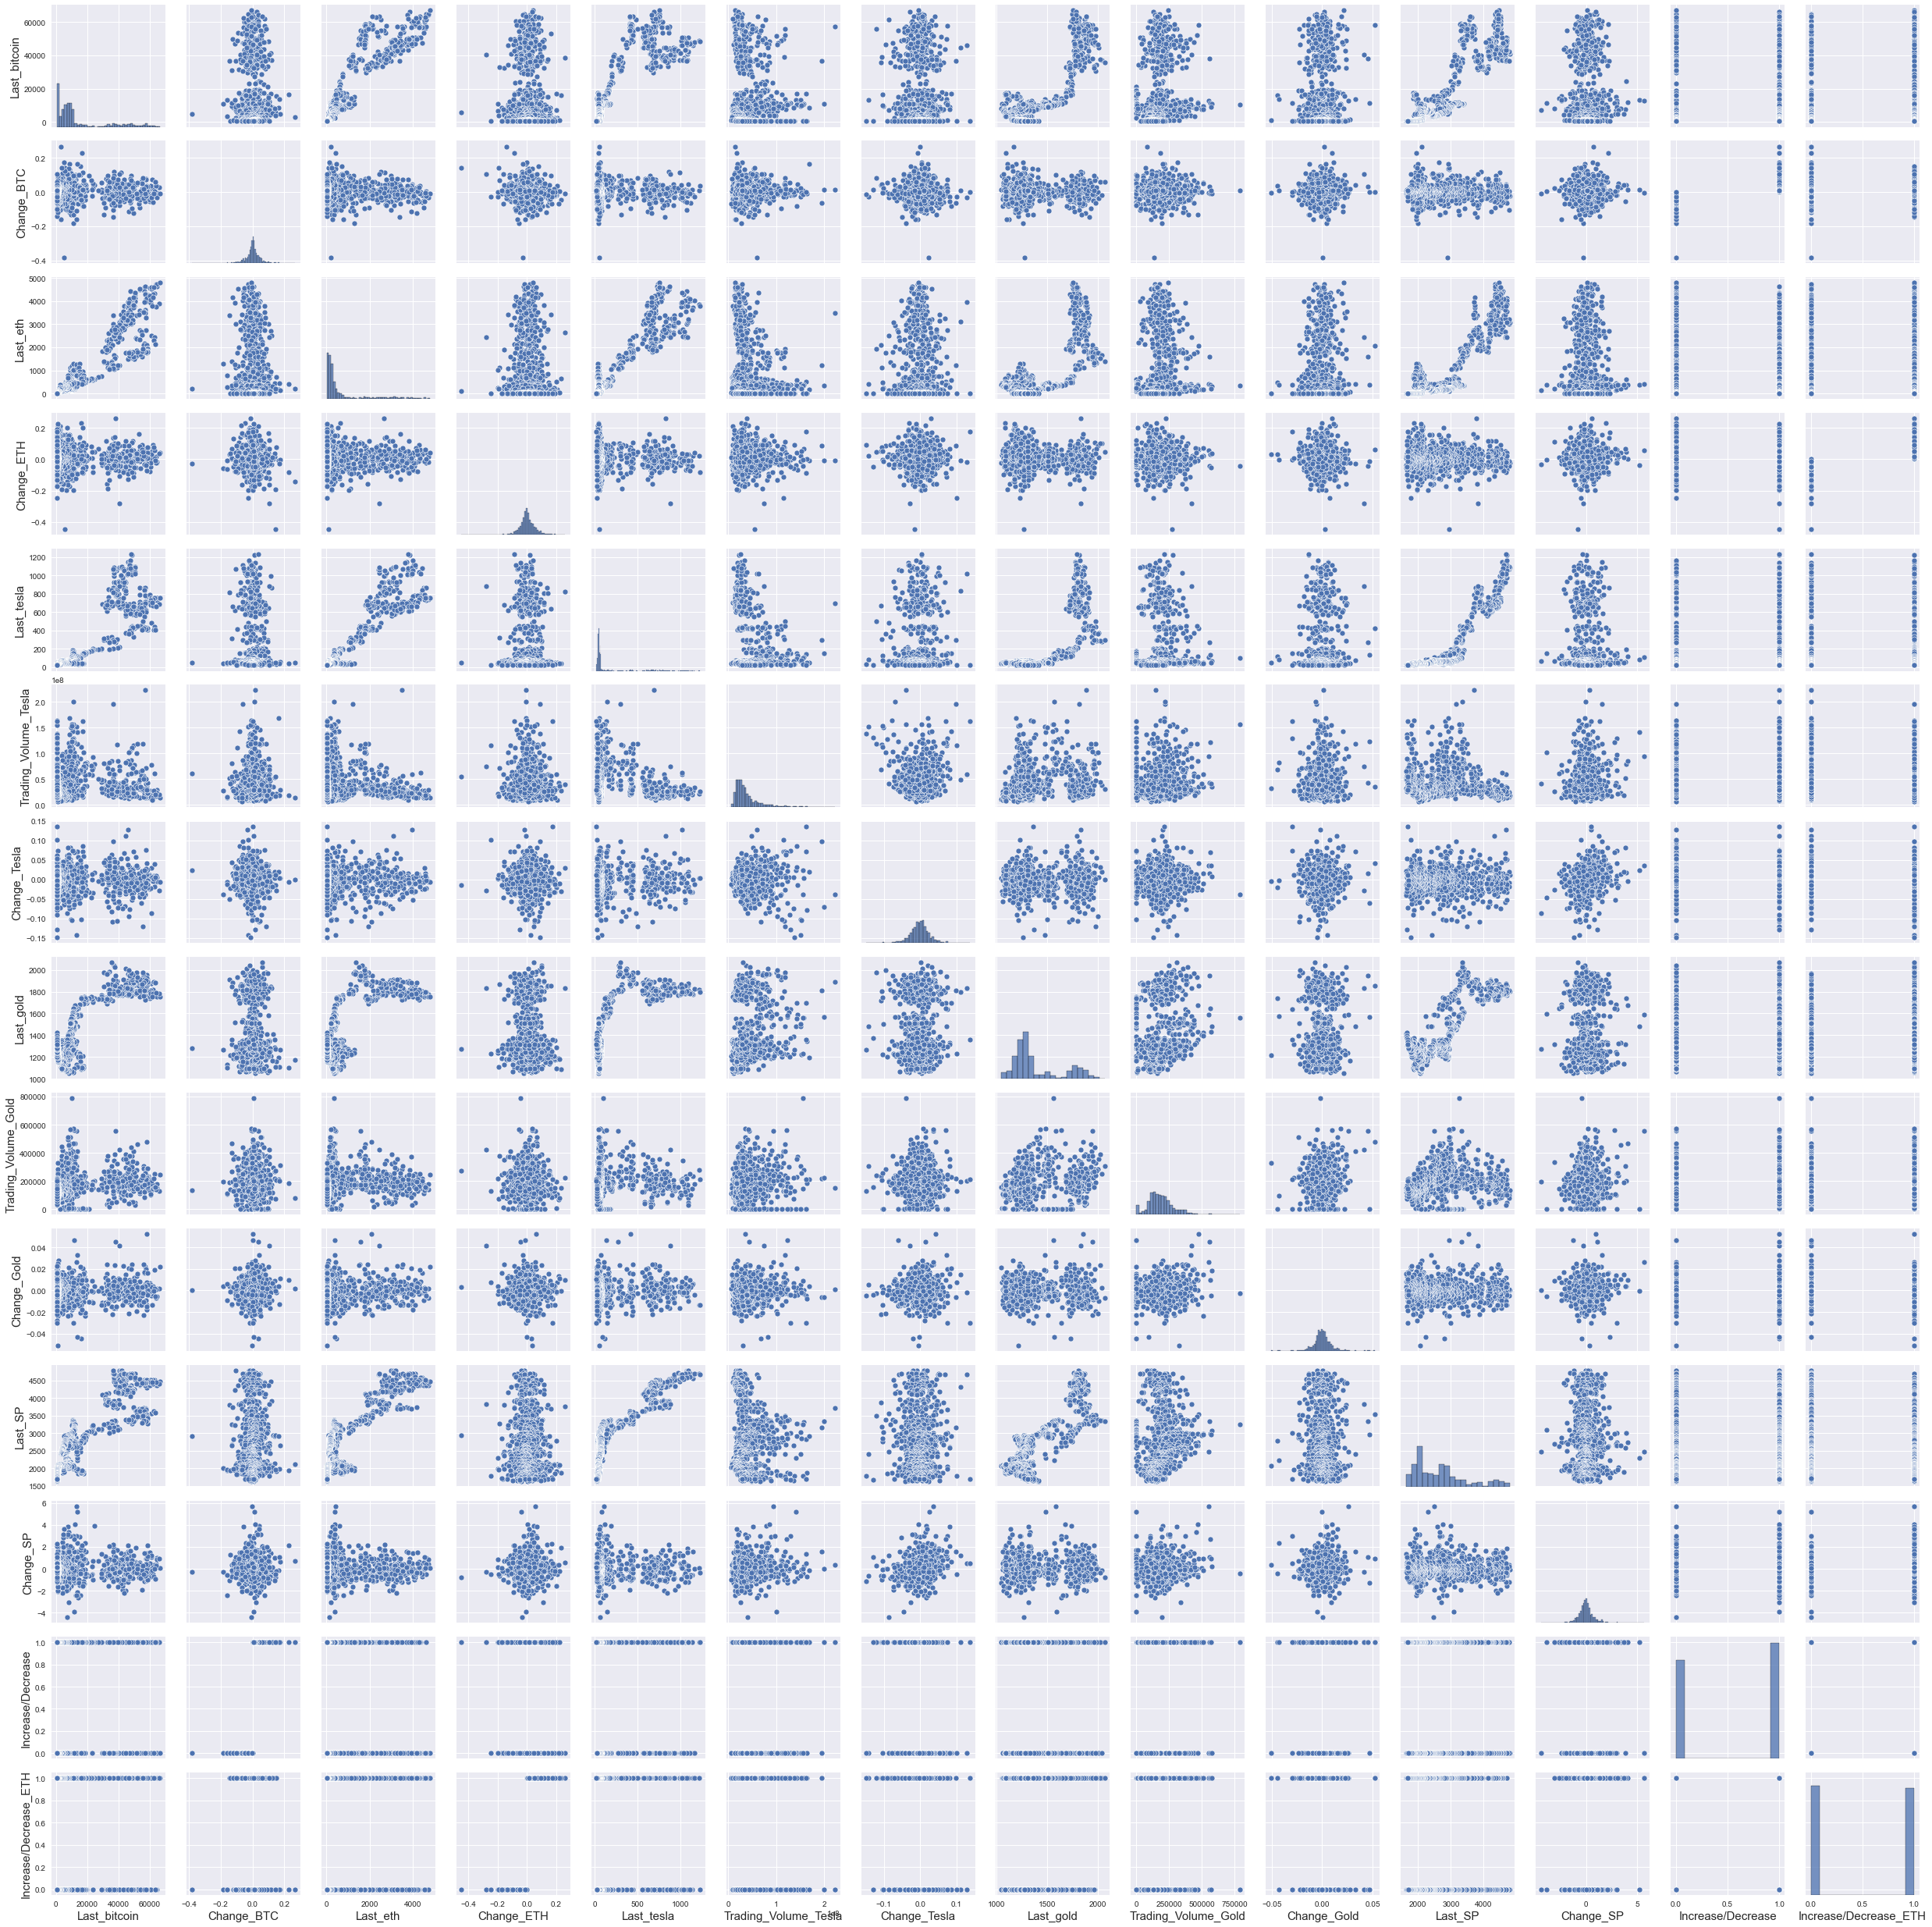

In [52]:
#Q6 b)
#Visualizing using pair plots

#sns.pairplot(data = crypto,x_vars=["Last_bitcoin","Last_eth","Last_tesla","Last_gold","Last_SP"],
         #   y_vars=["Last_bitcoin","Last_eth","Last_tesla","Last_gold","Last_SP"])
sns.pairplot(crypto)

# Fitting into Multiple Linear Regression

Q1 - Devise a hypothesis
Hypothesis: There exists a positive correlation between the Price of Bitcoin(ETH) for a day and Price of Tesla,gold and S&P Stocks. Relevant Null Hypothesis: H0: There is no relationship between the Price of Bitcoin(ETH) and Price of Tesla,gold and S&P Stocks. Alternative Hypothesis: H1: There exists a relationship between the Price of Bitcoin(ETH) and Price of Tesla,gold and S&P Stocks.

In [32]:
#Q2 & Q3 - Experiment to test hypothesis described above

#Multiple Linear regression for Bitcoin and other stock values
model_fit_bitcoin = smf.ols('Last_bitcoin~Last_tesla+Last_gold+Last_SP',data = crypto).fit()
print(model_fit_bitcoin.summary())

#Multiple Linear regression for ETH and other stock values
model_fit_eth = smf.ols('Last_eth ~ Last_tesla+Last_gold+Last_SP',data = crypto).fit()
print(' ')
print(' ')
print(' ')
print(model_fit_eth.summary())




                            OLS Regression Results                            
Dep. Variable:           Last_bitcoin   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     2423.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:53:08   Log-Likelihood:                -12612.
No. Observations:                1237   AIC:                         2.523e+04
Df Residuals:                    1233   BIC:                         2.525e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.315e+04   1692.253    -25.501      0.0

In [33]:
#required functions used for the rest of the code

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)


# fitted values (need a constant term for intercept)
model_fitted_y = model_fit_bitcoin.fittedvalues

# model residuals
model_residuals = model_fit_bitcoin.resid

# normalized residuals
model_norm_residuals = model_fit_bitcoin.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit_bitcoin.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit_bitcoin.get_influence().cooks_distance[0]

In [36]:
#required functions used for the rest of the code
def confusion_table(confusion_mtx):
    """Prints confusion table with labels"""
    confusion_df = pd.DataFrame({'y_pred=0': np.append(confusion_mtx[:, 0], confusion_mtx.sum(axis=0)[0]),
                                 'y_pred=1': np.append(confusion_mtx[:, 1], confusion_mtx.sum(axis=0)[1]),
                                 'Total': np.append(confusion_mtx.sum(axis=1), ''),
                                 '': ['y=0', 'y=1', 'Total']}).set_index('')
    return confusion_df

def positive_observations(y):
    # What percentage of observations are positive?
    proportion_1 = ((y == 1).sum() / len(y))
    pct_1        = np.around(proportion_1*100, decimals=3)
    display(HTML('<p><h4>{}%</h4>of observations are positive</p>'.format(pct_1)))


# Classifier stats
# -------------------------------------------------

def prior_error_rate(confusion_matrix):
    """The prior probability that a result is positive"""
    return 1 - (np.sum(confusion_mtx[1, :]) / np.sum(confusion_mtx))

def total_error_rate(confusion_matrix):
    """Derive total error rate from confusion matrix"""
    return 1 - np.trace(confusion_mtx) / np.sum(confusion_mtx)

def true_positive_rate(confusion_mtx):
    """or sensitivity: the proportion of actual POSITIVES that are correctly identified as such"""
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[1, :])

def false_negative_rate(confusion_mtx):
    """the proportion of actual POSITIVES that are incorrectly identified as negative"""
    return confusion_mtx[1, 0] / np.sum(confusion_mtx[1, :])

def false_positive_rate(confusion_mtx):
    """the proportion of actual NEGATIVES that are incorrectly identified as positives"""
    return confusion_mtx[0, 1] / np.sum(confusion_mtx[0, :])

def true_negative_rate(confusion_mtx):
    """or specificity: the proportion of actual NEGATIVES that are correctly identified as such"""
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[0, :])

def positive_predictive_value(confusion_mtx):
    """or precision: the proportion of predicted positives that are correctly predicted"""
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[:, 1])

def negative_predictive_value(confusion_mtx):
    """the proportion of predicted negatives that are correctly predicted"""
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[:, 0])

def classifier_stats(confusion_mtx):
    return pd.Series({'prior_error_rate': prior_error_rate(confusion_mtx),
                      'total_error_rate': total_error_rate(confusion_mtx),
                      'true_positive_rate (sensitivity)': true_positive_rate(confusion_mtx),
                      'false_negative_rate': false_negative_rate(confusion_mtx),
                      'false_positive_rate': false_positive_rate(confusion_mtx),
                      'true_negative_rate (specificity)': true_negative_rate(confusion_mtx),
                      'positive_predictive_value (precision)': positive_predictive_value(confusion_mtx),
                      'negative_predictive_value': negative_predictive_value(confusion_mtx)})

In [37]:
#Q3 Fitting Model using QDA

x = crypto[['Last_tesla','Change_Tesla','Last_gold','Change_Gold','Last_SP','Change_SP']]
y = crypto['Increase/Decrease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train_1 = np.array(x_train)
y_train_1 = np.array(y_train)

#print(np.isnan(x_train_1).any())

#x_train_1 = np.nan_to_num(x_train_1)


# Fit model
qda_fit = QuadraticDiscriminantAnalysis()
model_qda = qda_fit.fit(x_train_1, y_train_1)
y_pred_qda = model_qda.predict(x_test)

y_pred_qda

confusion_mtx = confusion_matrix(y_test, y_pred_qda)
display(confusion_table(confusion_mtx))

qda_stats = classifier_stats(confusion_mtx)
qda_stats

,y_pred=0,y_pred=1,Total
,,,
y=0,22,96,118
y=1,15,115,130
Total,37,211,


prior_error_rate                         0.475806
total_error_rate                         0.447581
true_positive_rate (sensitivity)         0.884615
false_negative_rate                      0.115385
false_positive_rate                      0.813559
true_negative_rate (specificity)         0.186441
positive_predictive_value (precision)    0.545024
negative_predictive_value                0.594595
dtype: float64

In [38]:
#Q3 Fitting Model using KNN

#model for k=3
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model_fit = KNN_model.fit(preprocessing.scale(x_train_1),y_train_1)

KNN_predict = KNN_model_fit.predict(x_test) #Predictions on Testing data
KNN_predict

confusion_mtx_knn = confusion_matrix(y_test, KNN_predict)
display(confusion_table(confusion_mtx_knn))

knn_stats = classifier_stats(confusion_mtx_knn)
knn_stats

,y_pred=0,y_pred=1,Total
,,,
y=0,0,118,118
y=1,0,130,130
Total,0,248,


/var/folders/dy/sbb0jsss1cnck9yj8m1qflxc0000gn/T/ipykernel_59979/2539008631.py:50: RuntimeWarning: invalid value encountered in long_scalars
  return confusion_mtx[0, 0] / np.sum(confusion_mtx[:, 0])


prior_error_rate                         0.475806
total_error_rate                         0.447581
true_positive_rate (sensitivity)         1.000000
false_negative_rate                      0.000000
false_positive_rate                      1.000000
true_negative_rate (specificity)         0.000000
positive_predictive_value (precision)    0.524194
negative_predictive_value                     NaN
dtype: float64

Evaluation using k-fold for QDA Model: 
--> folds=2, accuracy=0.539 (0.521,0.557)
--> folds=3, accuracy=0.525 (0.510,0.545)
--> folds=4, accuracy=0.525 (0.515,0.539)
--> folds=5, accuracy=0.548 (0.510,0.573)
--> folds=6, accuracy=0.525 (0.481,0.575)
--> folds=7, accuracy=0.534 (0.508,0.559)
--> folds=8, accuracy=0.533 (0.465,0.600)
--> folds=9, accuracy=0.529 (0.496,0.572)
--> folds=10, accuracy=0.532 (0.480,0.613)
--> folds=11, accuracy=0.535 (0.500,0.584)
--> folds=12, accuracy=0.533 (0.456,0.621)
--> folds=13, accuracy=0.538 (0.463,0.600)
--> folds=14, accuracy=0.530 (0.466,0.648)
--> folds=15, accuracy=0.537 (0.488,0.602)
--> folds=16, accuracy=0.537 (0.442,0.654)
--> folds=17, accuracy=0.526 (0.444,0.616)
--> folds=18, accuracy=0.532 (0.449,0.652)
--> folds=19, accuracy=0.538 (0.431,0.631)
--> folds=20, accuracy=0.529 (0.435,0.677)
--> folds=21, accuracy=0.529 (0.441,0.644)
--> folds=22, accuracy=0.526 (0.393,0.714)
--> folds=23, accuracy=0.531 (0.415,0.648)
--> folds=24, accuracy

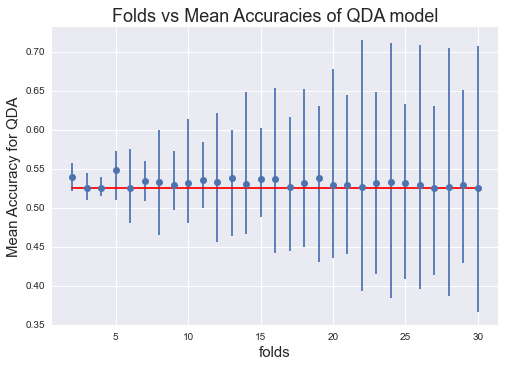

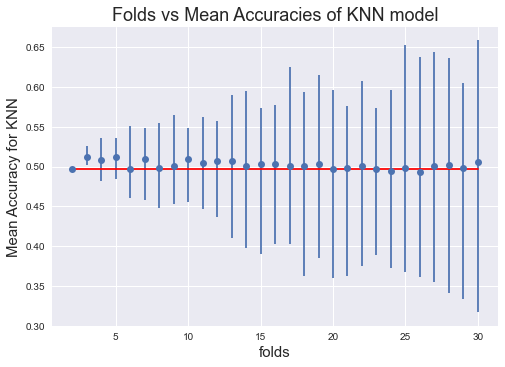

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut

#Q4 Obtain the estimate for the test error using Leave one out cross validation
#Leaveone out cv
leave_cv =  LeaveOneOut()
scores_qda = cross_val_score(model_qda, x, y, scoring='accuracy', cv=leave_cv, n_jobs=-1)
ideal_qda = np.mean(scores_qda)
#print(ideal_qda)
scores_knn = cross_val_score(KNN_model, x, y, scoring='accuracy', cv=leave_cv, n_jobs=-1)
ideal_knn = np.mean(scores_knn)
#print(ideal_knn)

folds = range(2,31)
# prepare the cross-validation procedure
#cv = KFold(n_splits=10, random_state=1, shuffle=True)
means, mins, maxs = list(),list(),list()
means_knn, mins_knn, maxs_knn = list(),list(),list()

#Q5 Obtain the estimate for the accuracy using K-fold cross validation for QDA and KNN
#Applied for different folds starting from k = 2 to K=30

# evaluate each k value
#applying k-fold cv for QDA Model   
print('Evaluation using k-fold for QDA Model: ')
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # create model
    #model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(model_qda, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # evaluate k value
    k_mean, k_min, k_max = np.mean(scores), scores.min(), scores.max()
    # report performance
    print('--> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)

#applying k-fold cv for knn Model  
print(' ')
print(' ')
print('Evaluation using k-fold for KNN Model: ')
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # create model
    #model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(KNN_model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # evaluate k value
    k_mean, k_min, k_max = np.mean(scores), scores.min(), scores.max()
    # report performance
    print('--> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means_knn.append(k_mean)
    # store min and max relative to the mean
    mins_knn.append(k_mean - k_min)
    maxs_knn.append(k_max - k_mean)
    


#plot for QDA means with leave one out cross validation accuracy being ideal
# line plot of k mean values with min/max error bars
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
plt.plot(folds, [ideal_qda for _ in range(len(folds))], color='r')
# show the plot
plt.title('Folds vs Mean Accuracies of QDA model')
plt.xlabel('folds')
plt.ylabel('Mean Accuracy for QDA')
plt.show()

#plot for KNN means with leave one out cross validation accuracy being ideal
# line plot of k mean values with min/max error bars
plt.errorbar(folds, means_knn, yerr=[mins_knn, maxs_knn], fmt='o')
# plot the ideal case in a separate color
plt.plot(folds, [ideal_knn for _ in range(len(folds))], color='r')
# show the plot
plt.title('Folds vs Mean Accuracies of KNN model')
plt.xlabel('folds')
plt.ylabel('Mean Accuracy for KNN')
plt.show()



#Q5 (continued explanation based on above results)
1. I tried to use folds varying from k=2 to k=30, for observing accuracies. The highest accuracy is observed for QDA when k=22 , the highest value is 0.714. The highest accuracy is observed for KNN is when k=30 , the highest value is 0.659.
2. Above graphs(Folds vs Mean Accuracies) are drawn to visualize the comparison with LOOCV accuracy (which is represented by red line in the graphs) and the dots are the mean accuracies obtained for various folds.From the graph, we can tell that The mean accuracies does not differ much compared to LOOCV accuracy obtained.

Note: First Graph is for QDA model and Second Graph is KNN model 

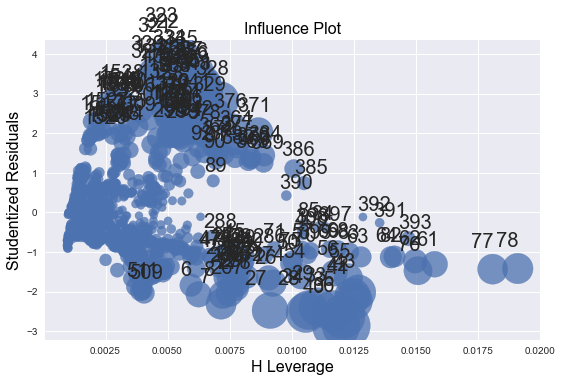

In [40]:
#Q6 a)
fig = sm.graphics.influence_plot(model_fit_bitcoin, criterion="cooks")
fig.tight_layout(pad=1.0)

#Q6 b) pairwise plot is already done while visualizing the data in the above cells of this doc.

/Users/sareddyrojareddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

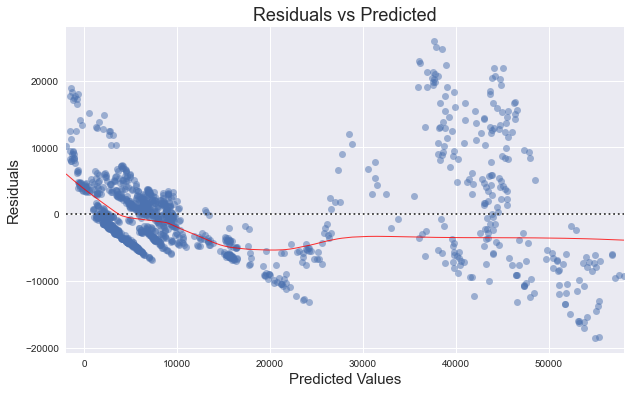

In [41]:
#Q6 c) 
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(6)
plot_lm_1.set_figwidth(10)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, model_residuals, data=crypto,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Predicted')
plot_lm_1.axes[0].set_xlabel('Predicted Values')
plot_lm_1.axes[0].set_ylabel('Residuals')


/Users/sareddyrojareddy/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


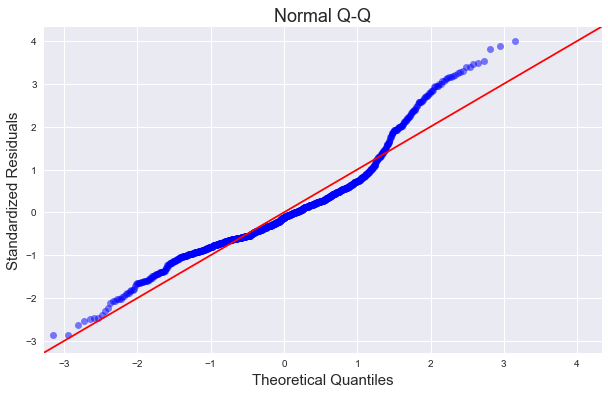

In [42]:
#Q6 d) 

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, lw=1)

plot_lm_2.set_figheight(6)
plot_lm_2.set_figwidth(10)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

In [43]:
#Q8 - What are Principal components selected
#since the stock values are correlated, I tried using only one Stock value and tried applying with only one stock values 
#like below, but the R-square value was less compared to when using with all stock values as predictors

model_fit_bitcoin_reduced = smf.ols('Last_bitcoin ~ Last_gold',data = crypto).fit()
print(' ')
print(' ')
print(' ')
print(model_fit_bitcoin_reduced.summary())

model_fit_eth_reduced = smf.ols('Last_eth ~ Last_tesla',data = crypto).fit()
print(' ')
print(' ')
print(' ')
print(model_fit_eth_reduced.summary())

 
 
 
                            OLS Regression Results                            
Dep. Variable:           Last_bitcoin   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     4205.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:55:25   Log-Likelihood:                -12889.
No. Observations:                1237   AIC:                         2.578e+04
Df Residuals:                    1235   BIC:                         2.579e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.144e+04   1341.236    -53.264   

In [44]:
#Q10 - Using Ridge method
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

#These are the predictors and Response for the multiple-linear regression used
x_ridge = crypto[['Last_tesla','Last_gold','Last_SP']]
y_ridge = crypto['Last_bitcoin']

x_ridge_train,x_ridge_test,y_ridge_train,y_ridge_test=train_test_split(x_ridge,y_ridge,test_size=0.2)

lambda_ = (np.logspace(10, -2, num=50))

#fits the model and discovers the hyperparameters that give the best results 
ridgecv = RidgeCV(alphas = lambda_, scoring = 'neg_mean_squared_error', normalize = True).fit(x_ridge, y_ridge)
#Below is the parameter that give the best results (k)
ridgecv.alpha_

0.01

In [45]:
#Q10 - continued..
lambda_val = ridgecv.alpha_
ridge_regr = Ridge(alpha = lambda_val, normalize = True)
ridge_fit = ridge_regr.fit(x_ridge_train, y_ridge_train)
ridge_pred = ridge_fit.predict(x_ridge_test)
print("Coefficient beta1: ",ridge_fit.coef_[0])
print("Coefficient beta2: ",ridge_fit.coef_[1])
print("Coefficient beta3: ",ridge_fit.coef_[2])

print("Intercept: ",ridge_fit.intercept_)
mse_ridge = mean_squared_error(y_ridge_test, ridge_pred)


Coefficient beta1:  22.207517220840575
Coefficient beta2:  31.558930284435462
Coefficient beta3:  3.7300163961026462
Intercept:  -43964.094505443165


In [51]:
#Q4 Compute the LOOCV errors from fitting the models. 
#This Block is just to show all the models accuracies and error estimates(if regression) all together at once.
model_multiple = LinearRegression();
#model_multiple_fit = model_multiple.fit(x_ridge_train,y_ridge_train);
#multiple_pred = model_multiple_fit.predict(x_ridge_test)
#mse_multi = mean_squared_error(y_ridge_test, multiple_pred)
#print(mse_multi)



scores_qda = cross_val_score(model_qda, x, y, scoring='accuracy', cv=leave_cv, n_jobs=-1)
print('Accuracy QDA: %.3f' % (np.mean(scores_qda)))

scores_knn = cross_val_score(KNN_model, x, y, scoring='accuracy', cv=leave_cv, n_jobs=-1)
print('Accuracy KNN: %.3f' % (np.mean(scores_knn)))

scores_multiple = cross_val_score(model_multiple, x_ridge, y_ridge, scoring='neg_mean_absolute_error',cv=leave_cv, n_jobs=-1)
print('Neg MSE of Multiple Regression : %.3f' % (np.mean(scores_multiple)))

#model_fit_bitcoin
scores_ridge = cross_val_score(ridge_regr, x_ridge_test, y_ridge_test, scoring='neg_mean_absolute_error',cv=leave_cv, n_jobs=-1)

print('Neg MSE of Ridge Regression : %.3f' % (np.mean(scores_ridge)))


Accuracy QDA: 0.525
Accuracy KNN: 0.497
MSE of Multiple Regression : -4751.588
MSE of Ridge Regression : -4528.861
